### Naver 영화



In [1]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request as req
import pandas as pd
import numpy as np
##################
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
driver = webdriver.Chrome('chromedriver.exe')
driver.get('https://movie.naver.com/movie/running/current.naver?view=list&tab=normal&order=point')
time.sleep(2)

### 평점 순 50위 이상// 평점, 제목, 장르순

In [3]:
check = []
for i in range(50):
    score = driver.find_elements_by_css_selector('dd:nth-child(2) > div > a > span.num')[i].text
    score = float(score)
    score = round(score,2)
    name = driver.find_elements_by_css_selector('dt.tit > a')[i].text
    out_line = driver.find_elements_by_css_selector('dd:nth-child(2) > span.link_txt > a')[i].text
    check.append([score,name,out_line])
check

[[10.0, '페이블', '액션'],
 [9.89, '워스', '코미디'],
 [9.88, '은혼 더 파이널', '범죄'],
 [9.41, '보스 베이비 2', '드라마'],
 [9.34, 'CCTV', '애니메이션'],
 [9.33, '샤먼 로드', '애니메이션'],
 [9.33, '아이들은 즐겁다', '코미디'],
 [9.33, '피아니스트', '모험'],
 [9.3, '나는 나대로 혼자서 간다', '공포'],
 [9.28, '극장판 귀멸의 칼날: 무한열차편', '다큐멘터리'],
 [9.24, '크루엘라', '드라마'],
 [9.21, '미스 사이공: 25주년 특별 공연', '드라마'],
 [9.09, '이번엔 잘 되겠지', '전쟁'],
 [9.06, '루카', '드라마'],
 [9.03, '꽃다발 같은 사랑을 했다', '애니메이션'],
 [9.02, '조제, 호랑이 그리고 물고기들', '드라마'],
 [9.0, '자메이카의 소울: 이나 데 야드', '범죄'],
 [9.0, '크레센도', '코미디'],
 [9.0, '폭력의 그림자', '공연실황'],
 [8.98, '번지 점프를 하다', '코미디'],
 [8.95, '이보다 더 좋을 순 없다', '애니메이션'],
 [8.93, '러브 액츄얼리', '모험'],
 [8.92, '중경삼림', '코미디'],
 [8.89, '이별의 아침에 약속의 꽃을 장식하자', '멜로/로맨스'],
 [8.8, '숏버스 이별행', '애니메이션'],
 [8.8, '피닉스', '드라마'],
 [8.79, '너의 이름은.', '다큐멘터리'],
 [8.78, '북샵', '드라마'],
 [8.77, '화양연화', '드라마'],
 [8.59, '와인 패밀리', '범죄'],
 [8.5, '죽어도 좋은 경험', '멜로/로맨스'],
 [8.5, '블랙 위도우', '코미디'],
 [8.47, '노매드랜드', '드라마'],
 [8.47, '혼자 사는 사람들', '멜로/로맨스'],
 [8.46, '낫아웃', '드라마'],
 [8.44, '빛나는 순간'

In [4]:
data = pd.DataFrame(check, columns = ['Score','Title','Genre'])
data.index = data.index+1
data

,Score,Title,Genre
1,10.00,페이블,액션
2,9.89,워스,코미디
3,9.88,은혼 더 파이널,범죄
4,9.41,보스 베이비 2,드라마
5,9.34,CCTV,애니메이션
6,9.33,샤먼 로드,애니메이션
7,9.33,아이들은 즐겁다,코미디
8,9.33,피아니스트,모험
9,9.30,나는 나대로 혼자서 간다,공포
10,9.28,극장판 귀멸의 칼날: 무한열차편,다큐멘터리


#### 평점 순위 50이상 장르 분석

In [5]:
from collections import Counter
Counter(data['Genre']).most_common(50)
dataDF=pd.DataFrame(Counter(data['Genre']).most_common(50), columns = ['Genre','Score'])
dataDF.index = dataDF.index+1
data_np = np.array(dataDF)
data_np

array([['드라마', 17],
       ['코미디', 9],
       ['애니메이션', 7],
       ['멜로/로맨스', 6],
       ['범죄', 3],
       ['모험', 2],
       ['다큐멘터리', 2],
       ['액션', 1],
       ['공포', 1],
       ['전쟁', 1],
       ['공연실황', 1]], dtype=object)

<AxesSubplot:xlabel='Genre', ylabel='Score'>

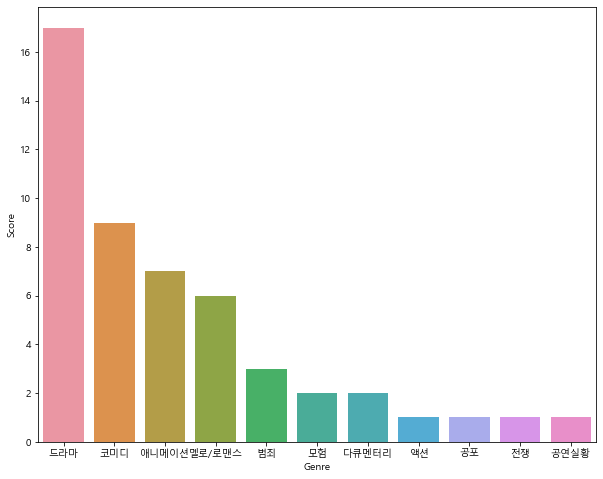

In [6]:
plt.figure(figsize=(10,8))
sns.barplot(x='Genre', y='Score',data=dataDF)

## 장르마다의 평점 평균 추출

### 영화 평점 합산

In [7]:
box = {}
sum_= {}
for i in range(len(check)): 
    if check[i][2] not in box: 
        ad = (check[i][0])
        box.setdefault(check[i][2] , ad)
    elif check[i][2] in box:
        bc = int(check[i][0])
        box[check[i][2]] =  ((box[check[i][2]]) + bc)
box

{'액션': 10.0,
 '코미디': 75.89,
 '범죄': 26.880000000000003,
 '드라마': 141.41,
 '애니메이션': 59.34,
 '모험': 17.33,
 '공포': 9.3,
 '다큐멘터리': 17.28,
 '전쟁': 9.09,
 '공연실황': 9.0,
 '멜로/로맨스': 48.89}

### 장르별 평점 평균 계산

In [8]:
i=0
count=0
val = [0]*len(box)
print(len(box))

for i in range(len(data_np)):#장르별 중복 개수
    for k,v in box.items():# 장르별 평점 합산
        if data_np[i][0] == k:
            v /= data_np[i][1]
            val[i] = round(v,2)
            
# 평균 계산된 값 갱신            
for i in range(len(data_np)):
    box[data_np[i][0]] = val[i]

box

11


{'액션': 10.0,
 '코미디': 8.43,
 '범죄': 8.96,
 '드라마': 8.32,
 '애니메이션': 8.48,
 '모험': 8.66,
 '공포': 9.3,
 '다큐멘터리': 8.64,
 '전쟁': 9.09,
 '공연실황': 9.0,
 '멜로/로맨스': 8.15}

In [9]:
box = list(box.items())
box = pd.DataFrame(box, columns=['Genre','Score'])
box.sort_values(by = 'Score')
type(box)
box

,Genre,Score
0,액션,10.00
1,코미디,8.43
2,범죄,8.96
3,드라마,8.32
4,애니메이션,8.48
5,모험,8.66
6,공포,9.30
7,다큐멘터리,8.64
8,전쟁,9.09
9,공연실황,9.00


### 장르별 평점 평균

<AxesSubplot:xlabel='Score', ylabel='Genre'>

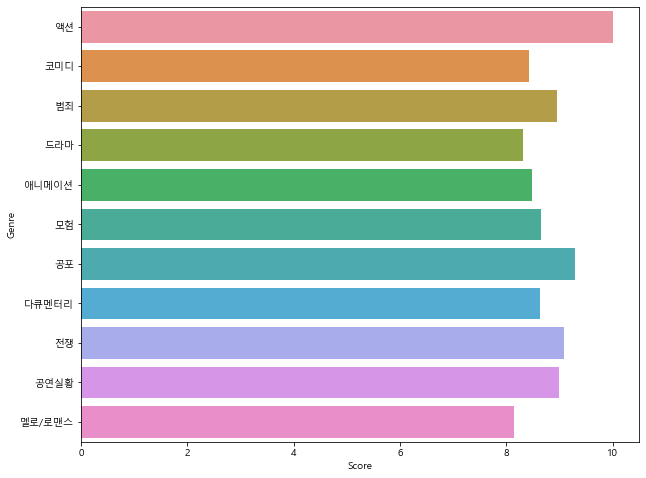

In [10]:
plt.figure(figsize=(10,8))

sns.barplot(y='Genre', x='Score',data=box)

# 예매순 평점 변화

In [11]:
driver.find_element_by_css_selector('#scrollbar > div.scrollbar-box > div > div > ul > li:nth-child(5) > a').click()
time.sleep(2)
s = driver.find_element_by_xpath('//*[@id="topRunning"]/ul/li[1]/a').click()

#### 총 리뷰개수

In [12]:
Total_re= driver.find_element_by_css_selector('#old_content > h5 > div > strong').text
total = int(Total_re)/10
if total == int:
    pass
elif total != int:
    total = round(total)+1
print(total,'page')

74 page


In [13]:
re_da = []
checkpoint = []
for i in range(1,total+1):
    driver.get('https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=191597&page={}'.format(i))
    re_len = len(driver.find_elements_by_css_selector('td.title'))
    for j in range(1,re_len+1):
        star = int(driver.find_elements_by_css_selector("#old_content > table > tbody > tr:nth-child({}) > td.title > div > em".format(j))[0].text)
        date = driver.find_elements_by_css_selector('#old_content > table > tbody > tr:nth-child({}) > td:nth-child(3)'.format(j))[0].text
        date = date[-8:]
        re_da.append([star, date])

In [14]:
df = pd.DataFrame(re_da)
df.index +=1
df.columns = ['score', 'date']
df

,score,date
1,9,21.07.24
2,7,21.07.23
3,4,21.07.23
4,10,21.07.23
5,10,21.07.23
...,...,...
730,10,21.07.21
731,10,21.07.21
732,10,21.07.21
733,5,21.07.21


### 날짜 구분 짓기 위함

In [15]:
checkpoint = []
for i in range(1,len(re_da)):
    if re_da[i][1] != re_da[i-1][1]:
        print(i)
        print(re_da[i][1],re_da[i-1][1])
        checkpoint.append(i)
print(checkpoint)

#df__=[0]*(len(checkpoint)+1)
df__ =  {}
i=0
j=0

#1,2,3,4,5
while i < len(checkpoint)+1:
    if i == 0:
        df__.setdefault(i,(df[ : checkpoint[j]]))     
    elif i == len(checkpoint):
        df__.setdefault(i,df[checkpoint[j-1]:])
    else:
        df__.setdefault(i,df[checkpoint[j-1]:checkpoint[j]])
    
    i+=1
    j+=1

1
21.07.23 21.07.24
87
21.07.22 21.07.23
292
21.07.21 21.07.22
[1, 87, 292]


### 날짜별 평점 합을 통한 평균 구함

In [16]:
def variabel_sum(dataFrame):
    sum1 = dataFrame['score'].sum()
    s = sum1
    s /= len(dataFrame)
    s = round(s,2)
    return s

### 일별 변수 생성

In [17]:
sum_ = [] #일별 평점 평균 데이터 저장
# df_1,2,3 변수 생성 저장
date_ = [""]*len(df__)
for i in range(len(df__)):
    globals()['df_{}'.format(i)] = df__[i]
    dt = df__.get(i)
    dt = dt.iloc[i]
    dt = dt['date']
    date_[i]= dt
 #   dt = "".join(dt)   
 #   dt = re.findall('\d{2}.\d{2}.\d{2}',dt)
 #   date_[i] = str(dt)
    sum_.append(variabel_sum(df__[i]))

In [18]:
print('일별 평점 평균\n','-'*30,'\n',sum_)
print(date_)

일별 평점 평균
 ------------------------------ 
 [9.0, 9.35, 9.12, 9.6]
['21.07.24', '21.07.23', '21.07.22', '21.07.21']


['21.07.24', '21.07.23', '21.07.22', '21.07.21']


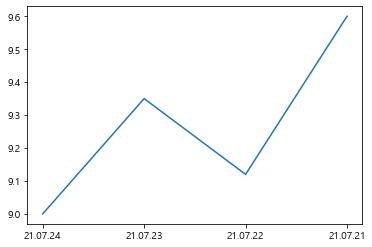

In [19]:
x=date_#.to_list()
print(x)
y=sum_#.to_list()

plt.plot(x,y)
plt.show()

<BarContainer object of 4 artists>

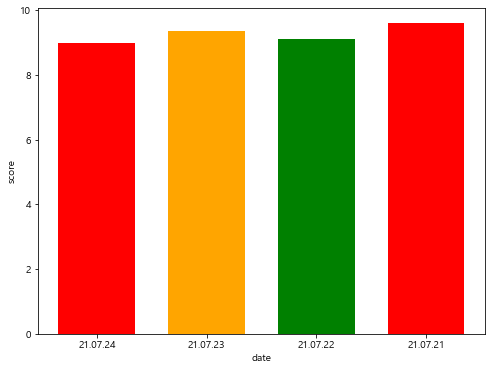

In [20]:
y=sum_#.to_list()
x=date_#.to_list()

plt.figure(figsize = (8,6))
plt.xlabel('date')
plt.ylabel('score')
colors = ['red','orange','green']
plt.bar(x,y,width=0.7, color=colors)
